In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs # this is a zipped tuple

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
coordinates[:3]

[(61.956705435413596, -70.90343115057843),
 (-24.371103671850577, -86.76911036082102),
 (-48.479921853016215, 10.856636666436117)]

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

631

In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a07f8916974249ab9126dd5005f8d253


In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50 and i <= 100):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a07f8916974249ab9126dd5005f8d253&q=dovers


In [16]:
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50 and i <= 600):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

    # Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | iqaluit
Processing Record 2 of Set 1 | marcona
City not found. Skipping...
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | niltepec
Processing Record 6 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 7 of Set 1 | bluff
Processing Record 8 of Set 1 | east london
Processing Record 9 of Set 1 | saint-paul
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | esna
Processing Record 12 of Set 1 | taoudenni
Processing Record 13 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 14 of Set 1 | cape town
Processing Record 15 of Set 1 | hobart
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | livingston
Processing Record 18 of Set 1 | kodiak
Processing Record 19 of Set 1 | castro
Processing Record 20 of Set 1 | vao
Processing Record 21 of Set 1 | temaraia
City not found. Skipping...
Processing Record 22 of Set 1

Processing Record 35 of Set 4 | esperance
Processing Record 36 of Set 4 | georgetown
Processing Record 37 of Set 4 | evensk
Processing Record 38 of Set 4 | majene
Processing Record 39 of Set 4 | sisimiut
Processing Record 40 of Set 4 | lensk
Processing Record 41 of Set 4 | sioux lookout
Processing Record 42 of Set 4 | jian
Processing Record 43 of Set 4 | rocha
Processing Record 44 of Set 4 | san miguelito
Processing Record 45 of Set 4 | jutai
Processing Record 46 of Set 4 | mata grande
Processing Record 47 of Set 4 | mar del plata
Processing Record 48 of Set 4 | bosaso
Processing Record 49 of Set 4 | coquimbo
Processing Record 50 of Set 4 | leningradskiy
Processing Record 1 of Set 5 | ouegoa
Processing Record 2 of Set 5 | hambantota
Processing Record 3 of Set 5 | wonthaggi
Processing Record 4 of Set 5 | mys shmidta
City not found. Skipping...
Processing Record 5 of Set 5 | killybegs
Processing Record 6 of Set 5 | azimur
City not found. Skipping...
Processing Record 7 of Set 5 | coahuay

Processing Record 23 of Set 8 | banfora
Processing Record 24 of Set 8 | sharjah
Processing Record 25 of Set 8 | solnechnyy
Processing Record 26 of Set 8 | pyay
Processing Record 27 of Set 8 | kushmurun
Processing Record 28 of Set 8 | mandan
Processing Record 29 of Set 8 | labuan
Processing Record 30 of Set 8 | roald
Processing Record 31 of Set 8 | mareeba
Processing Record 32 of Set 8 | agadez
Processing Record 33 of Set 8 | faya
Processing Record 34 of Set 8 | kuching
Processing Record 35 of Set 8 | palembang
Processing Record 36 of Set 8 | tubruq
City not found. Skipping...
Processing Record 37 of Set 8 | los llanos de aridane
Processing Record 38 of Set 8 | camocim
Processing Record 39 of Set 8 | asuncion
Processing Record 40 of Set 8 | geraldton
Processing Record 41 of Set 8 | kibala
Processing Record 42 of Set 8 | port blair
Processing Record 43 of Set 8 | ilinskiy
Processing Record 44 of Set 8 | fort saint james
Processing Record 45 of Set 8 | ucluelet
Processing Record 46 of Set

Processing Record 11 of Set 12 | volokolamsk
Processing Record 12 of Set 12 | atar
Processing Record 13 of Set 12 | antalaha
Processing Record 14 of Set 12 | broken hill
Processing Record 15 of Set 12 | clocolan
Processing Record 16 of Set 12 | clinton
Processing Record 17 of Set 12 | hobyo
Processing Record 18 of Set 12 | tala
Processing Record 19 of Set 12 | bilma
Processing Record 20 of Set 12 | labrea
Processing Record 21 of Set 12 | antibes
Processing Record 22 of Set 12 | aripuana
Processing Record 23 of Set 12 | kismayo
Processing Record 24 of Set 12 | imbituba
Processing Record 25 of Set 12 | itarema
Processing Record 26 of Set 12 | norton
Processing Record 27 of Set 12 | mackay
Processing Record 28 of Set 12 | avera
Processing Record 29 of Set 12 | nantucket
Processing Record 30 of Set 12 | amazar
Processing Record 31 of Set 12 | uyskoye
Processing Record 32 of Set 12 | coos bay
Processing Record 33 of Set 12 | deming
Processing Record 34 of Set 12 | minab
Processing Record 35

In [17]:
len(city_data)

618

In [23]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df#.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Dovers,12.8833,-61.1833,78.49,78,18,14.45,VC,2022-02-01 01:34:35
1,Iqaluit,63.7506,-68.5145,-29.31,66,0,3.00,CA,2022-02-01 01:36:08
2,Hermanus,-34.4187,19.2345,73.90,89,3,8.48,ZA,2022-02-01 01:36:08
3,Yellowknife,62.4560,-114.3525,-11.58,83,20,6.91,CA,2022-02-01 01:31:18
4,Niltepec,16.5667,-94.6167,72.77,85,0,4.18,MX,2022-02-01 01:36:09
...,...,...,...,...,...,...,...,...,...
613,Phuket,8.0000,98.2500,82.62,74,20,11.50,TH,2022-02-01 01:53:45
614,Yuxia,34.0615,108.6291,27.21,53,33,3.76,CN,2022-02-01 01:53:46
615,Bisert,56.8617,59.0523,15.46,97,100,4.09,RU,2022-02-01 01:53:46
616,Sillod,20.3000,75.6500,55.00,36,0,6.44,IN,2022-02-01 01:53:47


In [20]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [22]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [25]:
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Dovers,12.8833,-61.1833,78.49,78,18,14.45,VC,2022-02-01 01:34:35
1,Iqaluit,63.7506,-68.5145,-29.31,66,0,3.00,CA,2022-02-01 01:36:08
2,Hermanus,-34.4187,19.2345,73.90,89,3,8.48,ZA,2022-02-01 01:36:08
3,Yellowknife,62.4560,-114.3525,-11.58,83,20,6.91,CA,2022-02-01 01:31:18
4,Niltepec,16.5667,-94.6167,72.77,85,0,4.18,MX,2022-02-01 01:36:09
...,...,...,...,...,...,...,...,...,...
613,Phuket,8.0000,98.2500,82.62,74,20,11.50,TH,2022-02-01 01:53:45
614,Yuxia,34.0615,108.6291,27.21,53,33,3.76,CN,2022-02-01 01:53:46
615,Bisert,56.8617,59.0523,15.46,97,100,4.09,RU,2022-02-01 01:53:46
616,Sillod,20.3000,75.6500,55.00,36,0,6.44,IN,2022-02-01 01:53:47


In [26]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [28]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1643773617.2995696

In [29]:
#get todays date
today = time.strftime("%x")

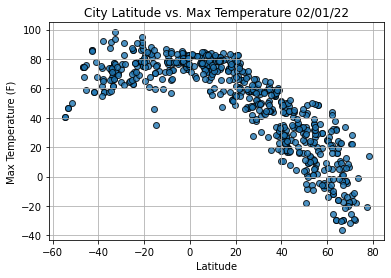

In [31]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

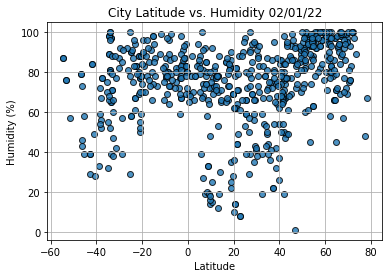

In [32]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

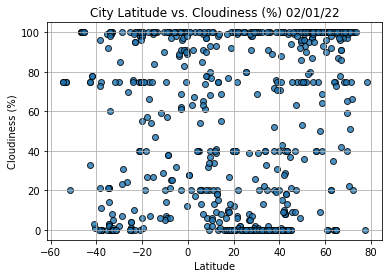

In [33]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

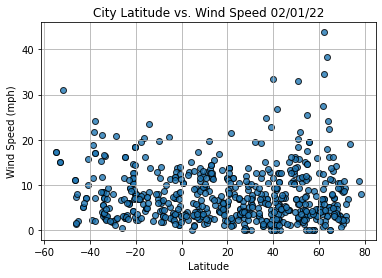

In [34]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()